In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [34]:
!pip install researchpy
import researchpy as rp

# Veri Seti Hakkında Bilgi

In [15]:
class Information():
    def __init__(self,data):
        self.data = data
    
    def info(self):
        print(data.info())
        
    
    def describe(self):
        print(data.describe())
        
        print("**********************************")
        print(" Loan Değişkeninin incelenmesi")
        print("Ortalama: " + str(data["loan"].mean()))
        print("Dolu Gözlem Sayısı: " + str(data["loan"].count())) 
        print("Maksimum Değer: " + str(data["loan"].max()))
        print("Minimum Değer: " + str(data["loan"].min()))
        print("Medyan: " + str(data["loan"].median()))
        print("Standart Sapma: " + str(data["loan"].std()))
        
    def shape(self):
        
        #type(data)
        print(data.axes)
        #print(self.data.axes)
        #print(" ndim = " + str(data.ndim))
        print(" Veri şekli = " + str(data.shape))
        print(" Veri büyüklüğü = " + str(data.size))
        #type(data.values)
    
    def head(self):
        
        data.head(5)
        # print(data.tail(3))
        
    def hedef_degisken(self):
        
        countNo = len(data[data.bad == 0])
        countYes = len(data[data.bad == 1])
        print("Risk barındırmayan müşterilerin yüzdesi : {:.2f}%".format((countNo / (len(data.bad))*100)))
        print("Risk barındıran müşterilerin yüzdesi : {:.2f}%".format((countYes / (len(data.bad))*100)))
        
        print("************************************")
        
        print(data.groupby('bad').mean().T)

# Görselleştirme

In [4]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def visual(self):
        data["job"].value_counts().plot.barh().set_title("Job Değişkeninin Sınıf Frekansları");
    
    def countplot(self):
        sns.countplot(x="bad", data=data, palette="bwr")
        plt.show()
        
    def figure(self):
        fig, ax = plt.subplots(1, 2, figsize = (18, 8))
        sns.barplot(x = "job", y = "loan", hue = "bad", data = data, ax = ax[0])
        ax[0].set_ylabel("loan")
        sns.catplot(x = "job", y = "loan", data = data, ax = ax[1]) 
        ax[1].set_ylabel("Loan")
        
    def distplot(self):
        sns.distplot(data.loan, kde = False);
        
    def pairplot(self):
        
        sns.pairplot(data);
        
        
    def pivotTable(self):
        
        print(data.pivot_table("loan",index = "bad",columns = "reason"))
        
        
        
        # Görselleştirme seçenekleri çoğaltılabilir. pyplot vb.

# İSTATİSTİK

In [18]:
class stats():
    def __init__(self,data):
        self.data = data
        
    def imports(self):
        
        import scipy.stats as stats
        import statsmodels.stats.api as sms
        import pylab
        from scipy.stats.stats import pearsonr
        import researchpy as rp
        
    
    def table(self):
        
        print(rp.summary_cont(data[["loan","value"]])) 
        
        print("*******************************")
        
        print(rp.summary_cat(data[["bad","job","reason"]]))
        
        print("*******************************")
        
        print(data[["loan","value"]].corr()) # Korelasyon
        
    def shapiro(self):
        
        import scipy.stats as stats
        from scipy.stats import shapiro
        test, p_value = shapiro(data["loan"])
        
        print("Varsayım kontrolünde pvalue = " + str(p_value))
        
        
        if p_value > 0.05:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur.")
        else:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. vardır.")
        
        test_istatistigi, pvalue = stats.ttest_1samp(data["loan"], popmean = 10000)
        print("pvalue = " + str(pvalue))
        
        if pvalue > 0.05 :
            print("H0 hipotezimiz reddedilemez.")
        else:
            print("H0 hipotezimiz reddelir.")   
        
        
        
    def qqplot(self):
        import pylab
        import scipy.stats as stats
        stats.probplot(data["loan"], dist="norm", plot=pylab)
        pylab.show()
        
    def korelasyon_analiz(self):
        
        # müşteri hakkındaki kötü raporlar arttığında ne olduğunu gözlemlemek istiyorum.
        data.plot.scatter("loan","value");

        print(data["loan"].corr(data["value"])) # parametrik karşılığı
        
        # Hedef değişken BAD için analiz
        
        print(data.corr()['bad'].abs().sort_values(ascending=False))
        
        
    def korelasyon_map(self):
        
        corr = data.corr()
        # print(corr)
        # sns.heatmap(corr, 
            #xticklabels=corr.columns.values,
            #yticklabels=corr.columns.values)
        
        fig,ax = plt.subplots(figsize=(15, 15))
        sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

# Ön İşleme

In [6]:
class PreProcessing():
    def __init__(self,data):
        self.data = data
    
    def outlier(self):
        
        t_data = data.dropna() # Eksik gözlemleri sildik. Aykırı gözlemleri rahatça görebilmek için.
        print(t_data.head())
        
        # Bir tane gözlemimi alıyorum.
        data_loan = data["loan"]
        sns.boxplot(x = data_loan);
        
        Q1 = data_loan.quantile(0.25)
        Q3 = data_loan.quantile(0.75)
        IQR = Q3-Q1
       
        
        print(" IQR = " + str(Q3-Q1))
        print(" Alt Sınır = " + str(Q1- 1.5*IQR))
        print(" Üst Sınır = " + str(Q3 + 1.5*IQR))
        print(data_loan.median())
       
        # Daha sonra aykırı değeri Baskılama ve ya Ortalama yöntemi ile doldurma işlemleri
    
    def MissingValue(self):
        
        print(data.isnull().sum())
        #print(data.isnull())
        #print(data[data.isnull().any(axis = 1)]) # Eksik değer olan satırlara erişmek
        
        # Bir gözlemi örnek alıyorum.
        # data["loan"]
        # data["loan"].mean()
        # print(data["loan"].fillna(data["loan"].mean())) # fillna doldurma işlemi için yapılıyor.
        
        # data.isna().values.any() #Kalan NaN değeri var mı kontrol etmek için
        
    def scale(self):
        
        # gerekmesi durumunda içerisinde çok büyük değerler olan gözlemler için yapılabilir.
        pass
        
    def dummies(self):
        
        data_one_hot = pd.get_dummies(data, columns = ["job"], prefix = ["job"])
        print(data_one_hot.head(3))

# Model İşlemleri ve Model Performansını Değerlendirme

In [7]:
class ModelSelect():
    def __init__(self,data):
        self.data = data
        
    def ModelSelect(self):
        
        # Problemime göre kullanacağım algoritmaları bu fonksiyon altında çağıracağım.
        # Regression, Classification, Clustering
        
        pass
    
    def ModelTuning(self):
        
        # GridSearch
        # best parameters
        
        pass
    
    def Evaluate(self):
        
        # Model performansını değerlendireceğim fonksiyon
        # MSE,RMSE, f1 score, AUC-CORVE, correlation matrix
        
        pass

# Finans Verisi

In [10]:
data = pd.read_csv('hmelq.csv')

In [19]:
info = Information(data)
visual = Visualization(data)
stats = stats(data)
preprocess = PreProcessing(data)

In [12]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB
None


In [13]:
info.hedef_degisken()

Risk barındırmayan müşterilerin yüzdesi : 80.06%
Risk barındıran müşterilerin yüzdesi : 19.94%
************************************
bad                  0             1
loan      18931.645127  16915.708275
mortdue   75242.395117  69029.488140
value    102394.448489  95308.460184
yoj           9.031378      8.067533
derog         0.140732      0.716012
delinq        0.238263      1.174888
clage       186.338950    153.497474
ninq          1.032692      1.780089
clno         21.552536     21.323572
debtinc      33.179142     40.881416


In [20]:
info.describe()

               bad          loan        mortdue          value          yoj  \
count  3576.000000   3576.000000    3262.000000    3512.000000  3264.000000   
mean      0.199385  18529.697987   74013.907992  101076.922759     8.832644   
std       0.399594  11262.834060   44016.833772   54865.275351     7.568046   
min       0.000000   1100.000000    2619.000000    8800.000000     0.000000   
25%       0.000000  11000.000000   46700.250000   65753.000000     3.000000   
50%       0.000000  16200.000000   65858.000000   89183.000000     7.000000   
75%       0.000000  23100.000000   91717.000000  118928.250000    13.000000   
max       1.000000  89900.000000  399550.000000  850000.000000    41.000000   

             derog       delinq        clage         ninq         clno  \
count  3149.000000  3225.000000  3397.000000  3273.000000  3443.000000   
mean      0.261670     0.432558   179.832529     1.186373    21.507116   
std       0.865178     1.099230    87.066198     1.728723    10.16

In [21]:
info.shape()

[RangeIndex(start=0, stop=3576, step=1), Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')]
 Veri şekli = (3576, 13)
 Veri büyüklüğü = 46488


In [22]:
info.head()

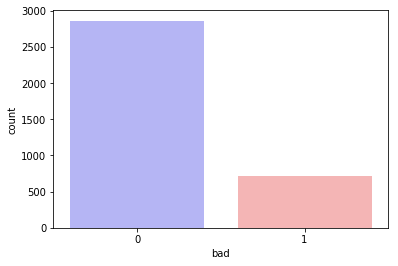

In [23]:
visual.countplot()

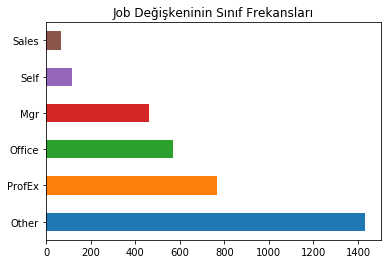

In [24]:
visual.visual()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


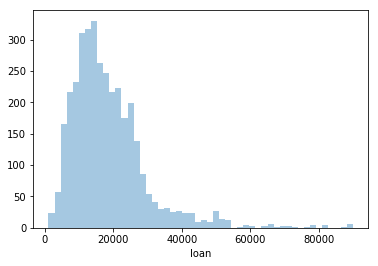

In [25]:
visual.distplot() # Dağılım

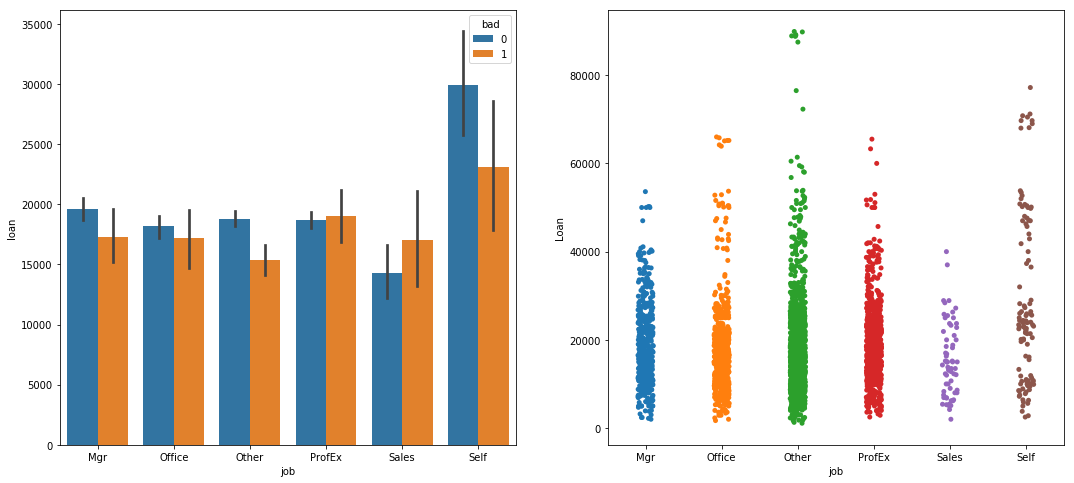

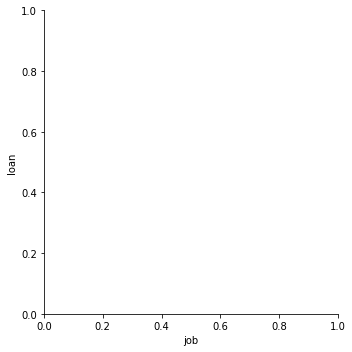

In [26]:
visual.figure()

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


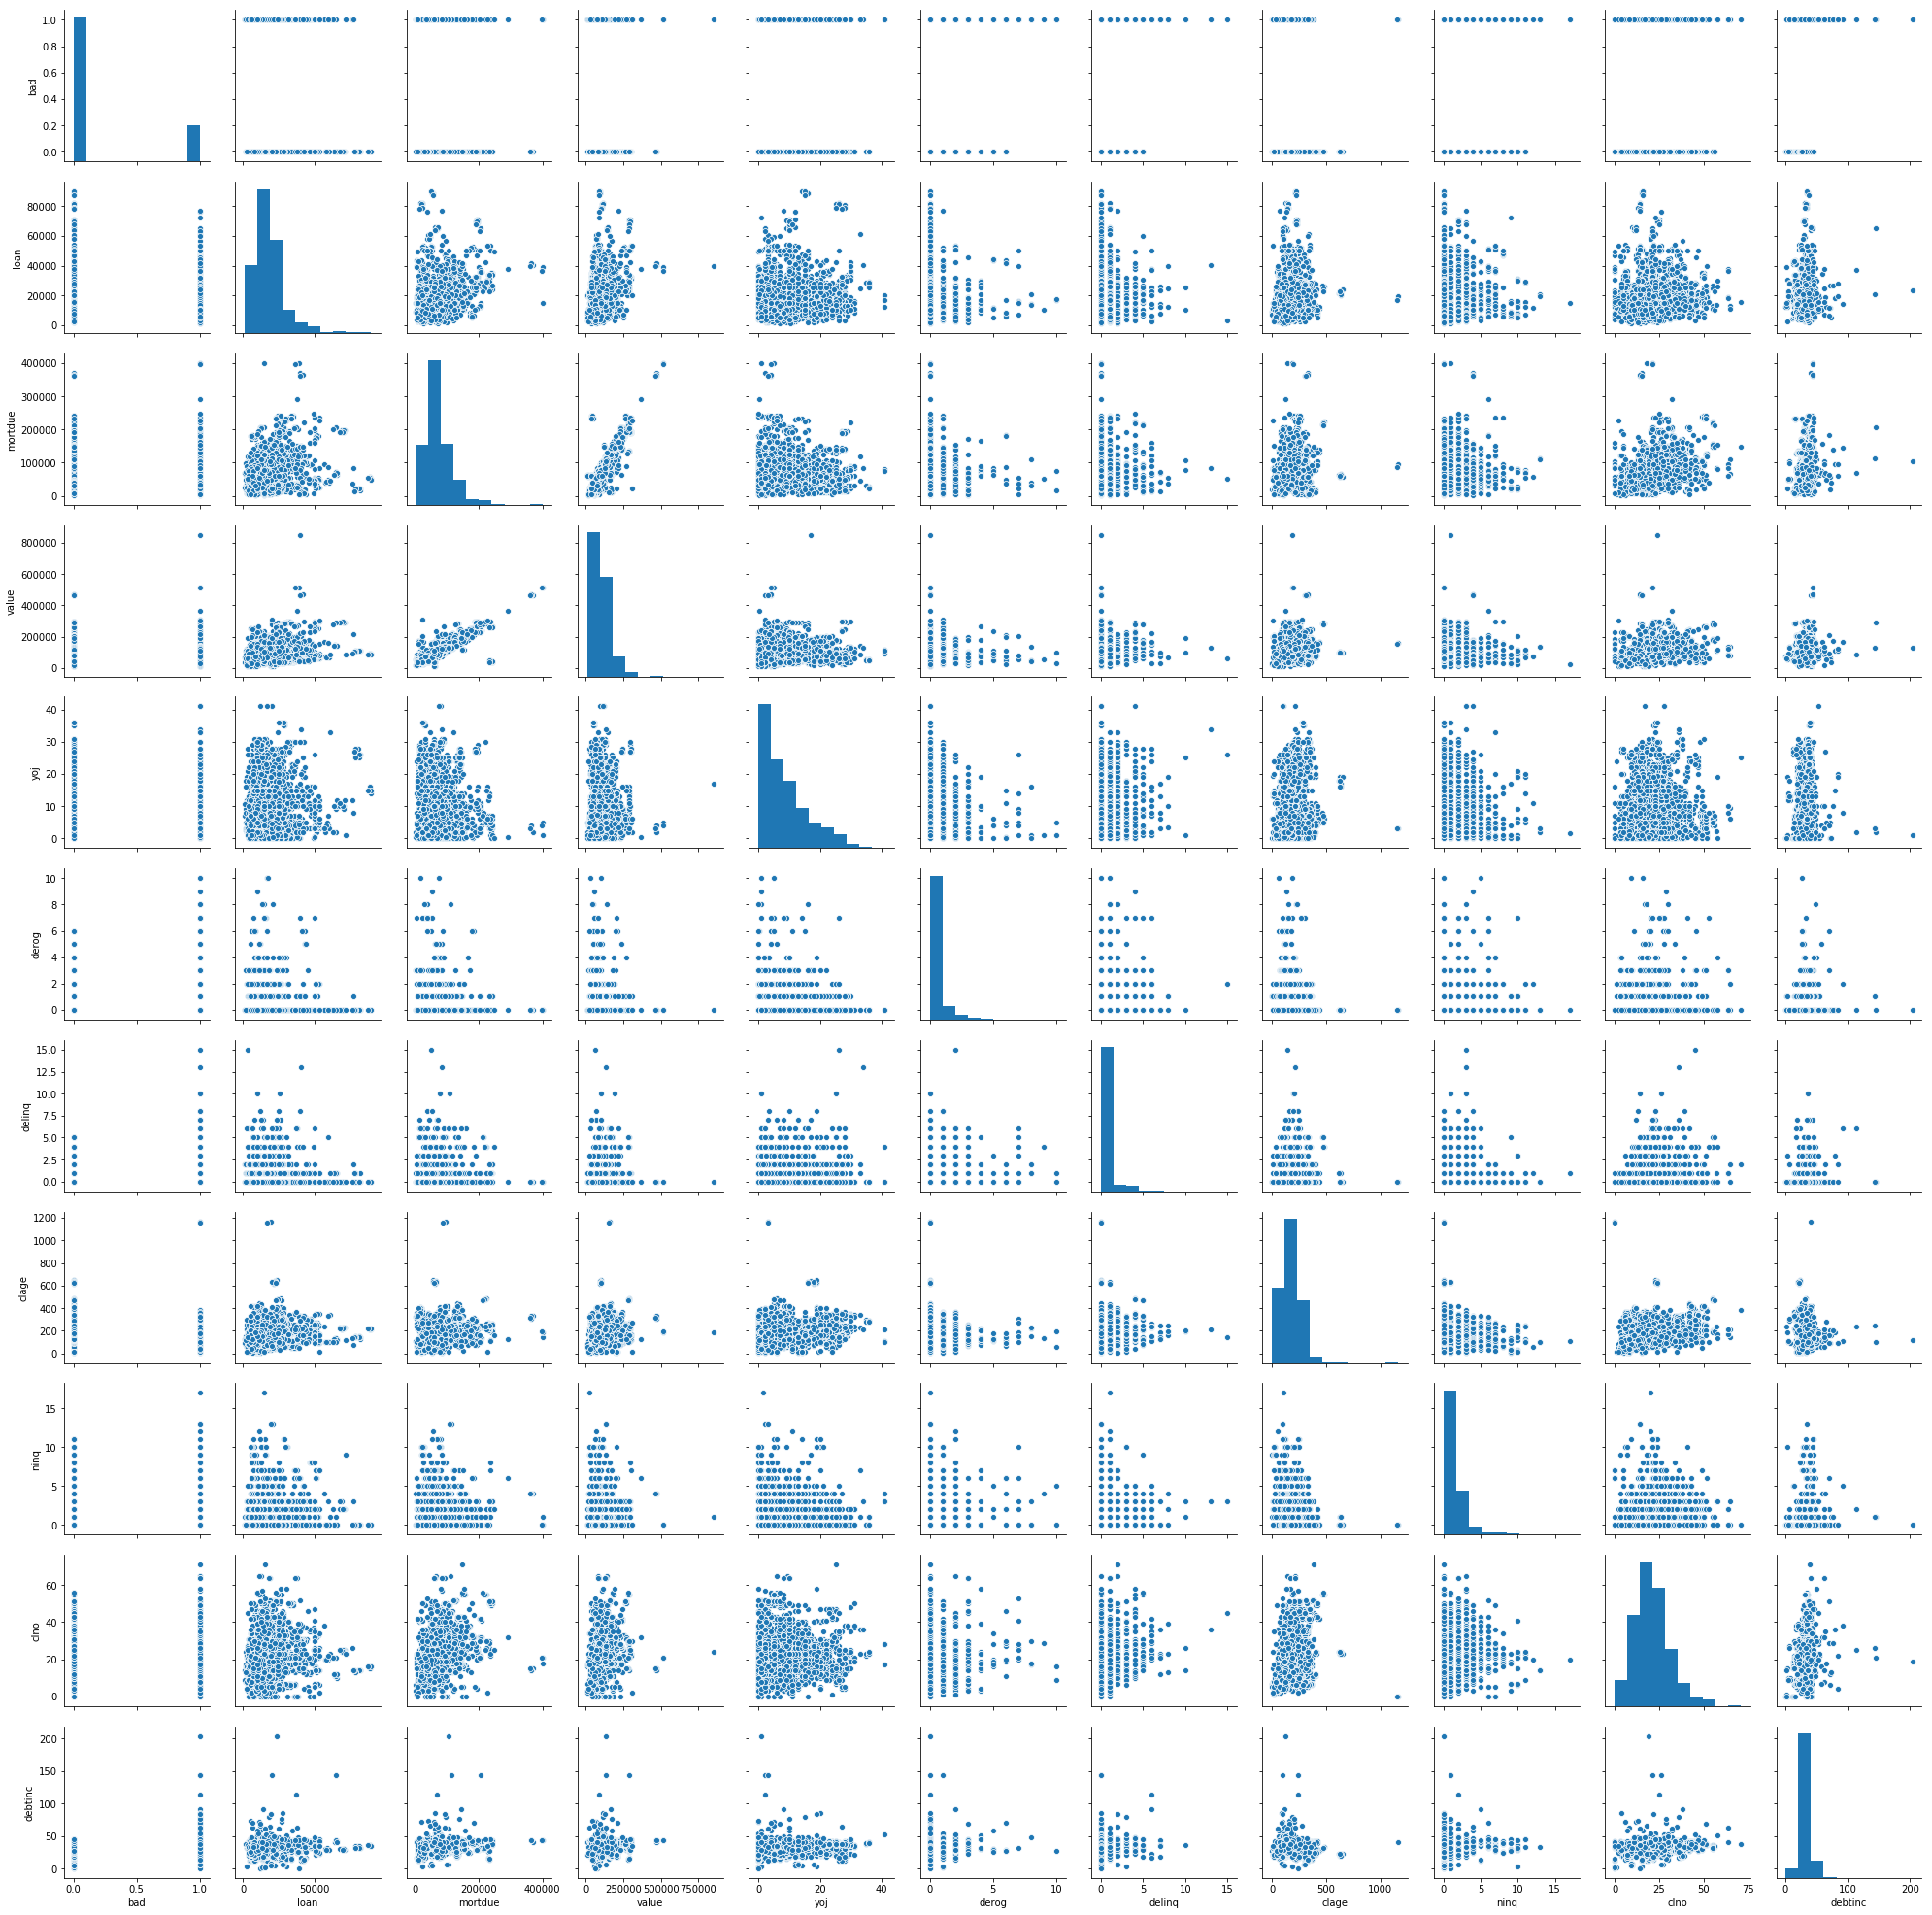

In [27]:
visual.pairplot()

In [28]:
visual.pivotTable()

reason       DebtCon       HomeImp
bad                               
0       19973.226308  17029.975430
1       19410.000000  12099.590164


     bad   loan   mortdue     value   reason  job   yoj  derog  delinq  \
153    0  18200   94727.0  136877.0  DebtCon  Mgr  15.0    0.0     0.0   
154    0  21700   79240.0   96784.0  DebtCon  Mgr   5.0    0.0     0.0   
155    0  34100  241931.0   36486.0  DebtCon  Mgr   1.0    0.0     2.0   
156    0   8400   62989.0   76718.0  HomeImp  Mgr   3.0    0.0     2.0   
157    0  17400   25859.0   43684.0  DebtCon  Mgr  16.0    1.0     0.0   

      clage  ninq  clno  debtinc  
153  168.96   2.0  26.0   36.056  
154   64.51   6.0  24.0   38.079  
155  196.01   3.0  50.0   42.459  
156  131.47   0.0  22.0   29.200  
157   95.36   1.0  17.0   27.108  
 IQR = 12100.0
 Alt Sınır = -7150.0
 Üst Sınır = 41250.0
16200.0


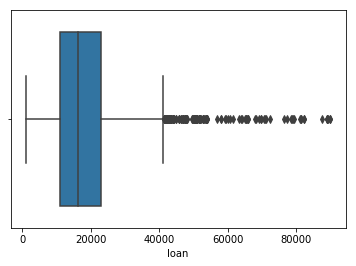

In [29]:
preprocess.outlier()

In [30]:
preprocess.dummies()

   bad   loan   mortdue     value   reason   yoj  derog  delinq   clage  ninq  \
0    0  81200   18834.0  108355.0  HomeImp  28.0    0.0     0.0  139.14   0.0   
1    0  12600  103960.0  127384.0  DebtCon   2.0    0.0     0.0  129.02   0.0   
2    0  18000   46865.0   61266.0  DebtCon   5.0    0.0     0.0  102.59   2.0   

   clno  debtinc  job_Mgr  job_Office  job_Other  job_ProfEx  job_Sales  \
0  14.0   34.042        0           0          0           0          0   
1  25.0   34.479        0           0          0           0          0   
2   9.0   26.354        0           0          0           0          0   

   job_Self  
0         0  
1         0  
2         0  


In [31]:
preprocess.MissingValue()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64


In [32]:
stats.shapiro()

Varsayım kontrolünde pvalue = 0.0
Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. vardır.
pvalue = 0.0
H0 hipotezimiz reddelir.


In [35]:
stats.imports()
stats.table()



  Variable       N         Mean          SD        SE   95% Conf.     Interval
0     loan  3576.0   18529.6980  11262.8341  188.3428  18160.4279   18898.9680
1    value  3512.0  101076.9228  54865.2754  925.8067  99261.7493  102892.0963
*******************************
  Variable  Outcome  Count  Percent
0      bad        0   2863    80.06
1                 1    713    19.94
2      job    Other   1431    41.98
3            ProfEx    767    22.50
4            Office    569    16.69
5               Mgr    461    13.52
6              Self    115     3.37
7             Sales     66     1.94
8   reason  DebtCon   2371    69.15
9           HomeImp   1058    30.85
*******************************
           loan     value
loan   1.000000  0.337453
value  0.337453  1.000000


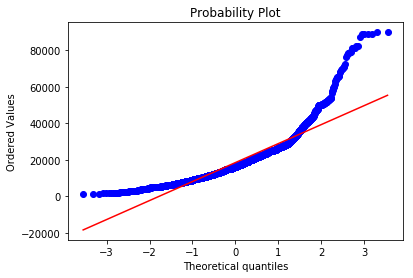

In [36]:
stats.qqplot()

0.3374528591463268
bad        1.000000
delinq     0.345548
derog      0.270980
debtinc    0.236738
ninq       0.174759
clage      0.150367
loan       0.071523
mortdue    0.056226
yoj        0.051532
value      0.050254
clno       0.008981
Name: bad, dtype: float64


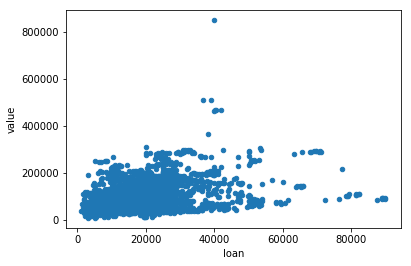

In [37]:
stats.korelasyon_analiz()

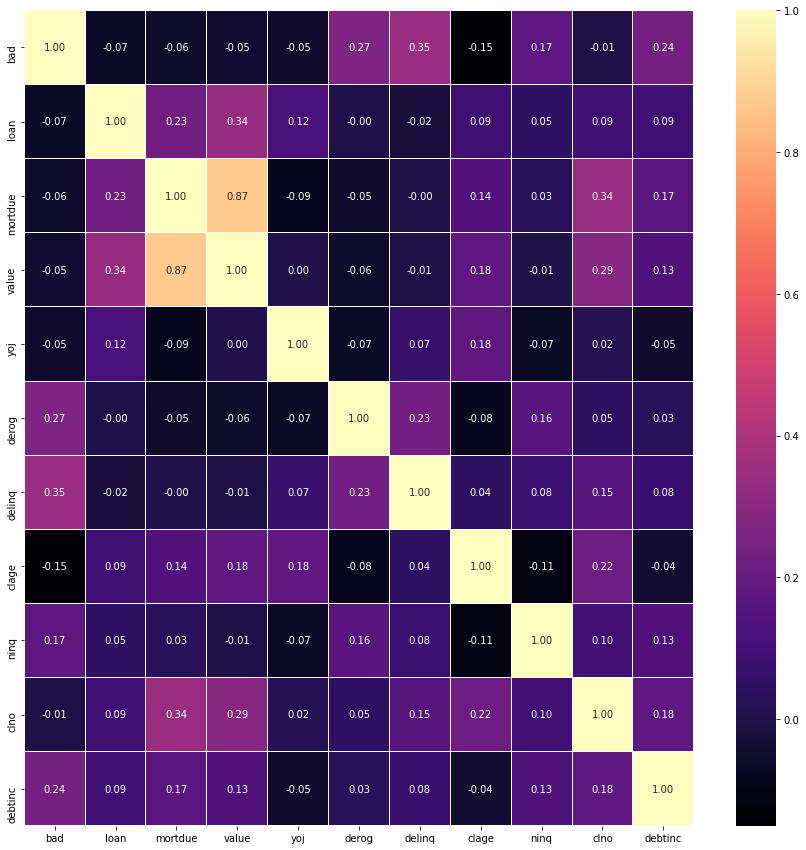

In [38]:
stats.korelasyon_map()